In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
import numpy as np

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# For creating wordcloud
from wordcloud import WordCloud

import spotipy
from spotipy.oauth2 import SpotifyOAuth
from sklearn import datasets
import yellowbrick
from yellowbrick.target import FeatureCorrelation

import json

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
# Load your credentials from the JSON file
with open("credentials.json", "r") as config_file:
    credentials = json.load(config_file)


In [3]:
client_id = credentials["client_id"]
client_secret = credentials["client_secret"]
uri = credentials["uri"]

# My own tailored playlist recommendation in Spotify

*Author: Antonina Anastasova @aanastasova*

---

## Table of Contents

- [Project Overview](#ch1)
    - [Introduction](#ch12)
    - [Building a content-based music recommendation system](#ch13)
    
- [Data Prerpocessing and EDA](#ch2) 
    - [Spotify Dataset](#ch21)
    - [EDA](#ch22)
    - [Personal Spotify Data](#ch23)   
    - [Analysis of personal Spotify Data](#ch24)

- [Support vector machines](#ch3)
    - [Explanation of SVM](#ch31)

- [Content-based filtering and PCA](#ch4)
    - [Exploration of content-based filtering](#ch41)
    - [Principal Component Analysis](#ch42)
    - [Cosine Similarity](#ch43)
   
- [Applying PCA and classify different genres using SVM](#ch5)
  
- [Extract recommendations using Cosine Similarity Calculation](#ch6)
    - [Apply cosine similarity between personal songs data and data for recommendation with PCA](#ch61)
    - [Apply cosine similarity between personal songs data and data for recommendation](#ch62)
    - [Compare](#ch63)
    - [Genre specific song recommendation](#ch64)

- [Evaluation and enhacement](#ch7)

- [Conclusion](#ch8)
    
- [Bibliography](#bibi)

---

## Project Overview  <a class="anchor" id="ch1"></a>

### Introduction  <a class="anchor" id="ch12"></a>

This project aims to create content-based music recommendation system. The main goal is to offer personalized music suggestions that closely match individual preferences. This aspiration arises from the need to enhance user satisfaction by providing recommendations that truly resonate.

An important step involves conducting a detailed analysis of the dataset, known as Exploratory Data Analysis (EDA). This process involves closely examining how data is spread out, how different pieces of data relate to each other, and patterns in how user interacts with music. This is done using both graphs and analytical methods.

We aim to understand the mechanics of recommendation systems, emphasizing content-based methods, Support Vector Machines (SVM), Principal Component Analysis (PCA), and Cosine Similarity. Our ultimate goal is to build a sophisticated recommendation system that tailors song suggestions to each user's unique preferences.

The core insight here is that music is deeply personal. No two individuals have the exact same musical taste. We're bridging this gap by combining musical features with data science techniques. Our journey begins by analyzing audio features like danceability, energy, tempo, and more, to uncover patterns within our music collections.

We then use SVM to classify tracks, transforming musical attributes into meaningful categories. PCA simplifies our analysis by reducing the complexity of musical attributes. Finally, Cosine Similarity helps us construct personalized recommendations that align with individual musical preferences.

This project is all about personalization. We believe that every music enthusiast deserves a recommendation system that resonates with their individuality. We're working to turn that belief into a reality by combining data and algorithms to create a recommendation system.

In essence, this project encompasses a blend of technology, analysis, and musical passion, all aimed at crafting an outstanding music recommendation experience. 

### Building a content-based music recommendation system


This project focuses on creating an advanced music recommendation system empowered by Principal Component Analysis (PCA). By analyzing audio features like tempo, loudness, and danceability, we aim to provide users with song suggestions tailored to their preferences. PCA will play a pivotal role in reducing feature dimensionality, enhancing recommendation accuracy, and improving overall system efficiency.

We will preprocess a comprehensive music dataset, extract meaningful audio features, and apply PCA for dimensionality reduction. The resulting PCA-transformed features will enable us to generate user-specific profiles and make recommendations based on a user's musical taste. This project underscores the impact of mathematical techniques, particularly PCA, in refining content-based music recommendation systems, ultimately delivering a more enjoyable music listening experience.

<img src="recommend.png"> [https://towardsdatascience.com/part-iii-building-a-song-recommendation-system-with-spotify-cf76b52705e7.]

As previously discussed, the objective of a recommendation algorithm is to provide suggestions or predictions for items that align with a user's preferences, drawing from their individual data or the collective user database. While we'll delve into the specifics of these recommendation techniques and various types of recommendation systems shortly, here's a high-level conceptual framework to illustrate the song recommendation process for now.

## Data Prepocessing and EDA  <a class="anchor" id="ch2"></a>

We are going to be working with two datasets as our data pool for song recommendations- "tracks.csv" and "artists.csv". [https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?select=artists.csv]

artists.csv: Details of 1.1M artists on Spotify.
tracks.csv: Audio features of 600k tracks available on Spotify.

Further, personal data from my spotify account will be extracted and converted to a dataframe. 

### Spotify Dataset

#### Read Tracks data

In [4]:
tracks = pd.read_csv("tracks.csv")

In [5]:
tracks.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [6]:
tracks.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [7]:
tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


In [8]:
tracks.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

##### Description of each column.

    id: Unique identifier for each track (varies).

    name: The name of the track (text).

    popularity: Popularity score of the track, typically ranging from 0 to 100.

    duration_ms: The duration of the track in milliseconds (integer value).

    explicit: Indicates whether the track contains explicit content (0 for no, 1 for yes).

    artists: The name(s) of the artist(s) associated with the track (text).

    id_artists: Unique identifier(s) for the artist(s) associated with the track (varies).

    release_date: The release date of the track (date).

    danceability: A measure of how suitable the track is for dancing, ranging from 0 to 1.

    energy: A measure of the energy in the track, ranging from 0 to 1.

    key: The key in which the track is written (integer value representing different keys, typically 0 to 11).

    loudness: A measure of the loudness of the track in decibels (dB, numeric).

    mode: Modality of the track (0 for minor, 1 for major).

    speechiness: A measure of the presence of spoken words in the track, ranging from 0 to 1.

    acousticness: A measure of the acoustic nature of the track, ranging from 0 to 1.

    instrumentalness: A measure of the presence of instrumental elements in the track, ranging from 0 to 1.

    liveness: A measure of the presence of a live audience in the track, ranging from 0 to 1.

    valence: A measure of the positivity of the track, ranging from 0 to 1.

    tempo: The tempo of the track in beats per minute (BPM, numeric).

    time_signature: The time signature of the track (integer value, typically 3 or 4).

#### Check for missing values

In [9]:
# Assuming 'tracks' is your DataFrame
missing_values = tracks.isna().sum()

# Display columns with missing values

missing_values

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [10]:
rows_with_missing_values = tracks[tracks.isna().any(axis=1)]
rows_with_missing_values

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
226336,4iH7negBYMfj2z0wDNmgdx,NaN,28,264973,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1994-01-01,0.512,0.578,0,-12.280,0,0.0299,0.0433,0.000064,0.5160,0.692,156.465,1
510975,04d5kbLvSAIBt3pGcljdhC,NaN,0,184293,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.426,0.285,11,-11.970,1,0.0466,0.9950,0.264000,0.2930,0.583,135.661,4
510976,05tRkgyxVdwMePGqOXMDYU,NaN,0,191587,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.344,0.186,0,-13.495,1,0.0745,0.9950,0.000000,0.1150,0.290,79.591,1
510978,0YAMRgAQH6tkTh4sWNXr8L,NaN,0,191573,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.316,0.257,3,-13.611,0,0.0549,0.9950,0.769000,0.5190,0.529,68.682,3
510979,1K6MQQxmFpPb66ZnaiIpHX,NaN,0,167602,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.558,0.283,1,-12.847,1,0.0646,0.9960,0.000000,0.4530,0.608,70.379,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517206,6OH9mz9aFbGlbf74cBwYWD,NaN,2,209760,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.506,0.598,7,-4.672,0,0.0635,0.7710,0.000001,0.6910,0.800,91.172,4
517215,15RqFDA86slfzujSQMEX4i,NaN,2,257280,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.612,0.615,5,-5.609,1,0.0551,0.8540,0.000023,0.0541,0.809,90.536,4
520127,0hKA9A2JPtFdg0fiMhyjQD,NaN,6,194081,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1974-12-31,0.471,0.369,4,-12.927,0,0.1460,0.9680,0.001100,0.1410,0.766,94.063,4
525238,1kR4gIb7nGxHPI3D2ifs59,NaN,26,289440,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1998-01-05,0.501,0.583,7,-9.460,0,0.0605,0.6900,0.003960,0.0747,0.734,138.391,4


#### Check for missing values

In [11]:
missing_values = tracks.isna().sum()

# Display columns with missing values

missing_values

rows_with_missing_values = tracks[tracks.isna().any(axis=1)]
rows_with_missing_values

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
226336,4iH7negBYMfj2z0wDNmgdx,NaN,28,264973,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1994-01-01,0.512,0.578,0,-12.280,0,0.0299,0.0433,0.000064,0.5160,0.692,156.465,1
510975,04d5kbLvSAIBt3pGcljdhC,NaN,0,184293,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.426,0.285,11,-11.970,1,0.0466,0.9950,0.264000,0.2930,0.583,135.661,4
510976,05tRkgyxVdwMePGqOXMDYU,NaN,0,191587,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.344,0.186,0,-13.495,1,0.0745,0.9950,0.000000,0.1150,0.290,79.591,1
510978,0YAMRgAQH6tkTh4sWNXr8L,NaN,0,191573,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.316,0.257,3,-13.611,0,0.0549,0.9950,0.769000,0.5190,0.529,68.682,3
510979,1K6MQQxmFpPb66ZnaiIpHX,NaN,0,167602,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.558,0.283,1,-12.847,1,0.0646,0.9960,0.000000,0.4530,0.608,70.379,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517206,6OH9mz9aFbGlbf74cBwYWD,NaN,2,209760,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.506,0.598,7,-4.672,0,0.0635,0.7710,0.000001,0.6910,0.800,91.172,4
517215,15RqFDA86slfzujSQMEX4i,NaN,2,257280,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.612,0.615,5,-5.609,1,0.0551,0.8540,0.000023,0.0541,0.809,90.536,4
520127,0hKA9A2JPtFdg0fiMhyjQD,NaN,6,194081,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1974-12-31,0.471,0.369,4,-12.927,0,0.1460,0.9680,0.001100,0.1410,0.766,94.063,4
525238,1kR4gIb7nGxHPI3D2ifs59,NaN,26,289440,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1998-01-05,0.501,0.583,7,-9.460,0,0.0605,0.6900,0.003960,0.0747,0.734,138.391,4


Only missing values in the name column; however we also notice empty values for artists. 

#### Read artists data

In [12]:
artists = pd.read_csv("artists.csv")

In [13]:
artists.tail()

,id,followers,genres,name,popularity
1162090,3cOzi726Iav1toV2LRVEjp,4831.0,['black comedy'],Ali Siddiq,34
1162091,6LogY6VMM3jgAE6fPzXeMl,46.0,[],Rodney Laney,2
1162092,19boQkDEIay9GaVAWkUhTa,257.0,[],Blake Wexler,10
1162093,5nvjpU3Y7L6Hpe54QuvDjy,2357.0,['black comedy'],Donnell Rawlings,15
1162094,2bP2cNhNBdKXHC6AnqgyVp,40.0,['new comedy'],Gabe Kea,8


We will use the artists dataset only for assigning genre to a song from the tracks dataset if possible.

##### Cleaning data

In [14]:
# Define a function to convert a string representation of a list to a list of strings, 
# this is going to be used for such columns in our datasets

def convert_str_to_list(s):
    # Check if the input is a string and starts with '[' and ends with ']'
    if isinstance(s, str) and s.startswith("[") and s.endswith("]"):
        # Remove the square brackets and split the string based on ', ' while stripping whitespace
        s = s[1:-1]  # Remove the square brackets
        return [item.strip(" '\"\n\r") for item in s.split(',')]
    else:
        # If it's not a valid string representation of a list, return an empty list or handle it differently
        return []


In [15]:
# Apply the function to the "id_artists" column

tracks["id_artists"] = tracks["id_artists"].apply(convert_str_to_list)

In [16]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],[14jtPCOoNZwquk5wd9DxrY],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],[3BiJGZsyX9sJchTqcSA7Su],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [17]:
# Apply the function to the "artists" column

tracks["artists"] = tracks["artists"].apply(convert_str_to_list)

In [18]:
# Apply the function to the "genre" column

artists["genres"] = artists["genres"].apply(convert_str_to_list)

In [19]:
artists.tail()

,id,followers,genres,name,popularity
1162090,3cOzi726Iav1toV2LRVEjp,4831.0,[black comedy],Ali Siddiq,34
1162091,6LogY6VMM3jgAE6fPzXeMl,46.0,[],Rodney Laney,2
1162092,19boQkDEIay9GaVAWkUhTa,257.0,[],Blake Wexler,10
1162093,5nvjpU3Y7L6Hpe54QuvDjy,2357.0,[black comedy],Donnell Rawlings,15
1162094,2bP2cNhNBdKXHC6AnqgyVp,40.0,[new comedy],Gabe Kea,8


We need a column "release_year" for our analysis.

In [20]:
# Create new column "release_year" to store year of release of song/track
print('\nCreating new field "release_year"...')
tracks["release_year"] = tracks.apply(lambda x: x["release_date"][0:4], axis=1)
tracks.head()


Creating new field "release_year"...


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,[Fernando Pessoa],[14jtPCOoNZwquk5wd9DxrY],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,[Dick Haymes],[3BiJGZsyX9sJchTqcSA7Su],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922


In [21]:
## Get a decade of a song

tracks["release_year"] = tracks["release_year"].astype("int")

def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

tracks["decade"] = tracks["release_year"].apply(get_decade)

In [22]:
tracks.head(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,decade
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.645,0.445,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922,1920s
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,[Fernando Pessoa],[14jtPCOoNZwquk5wd9DxrY],1922-06-01,0.695,0.263,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922,1920s
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.434,0.177,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922,1920s


##### Adding genre column to our tracks dataset

In [23]:
tracks.head(20)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,decade
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,1922,1920s
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,[Fernando Pessoa],[14jtPCOoNZwquk5wd9DxrY],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1922,1920s
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,1922,1920s
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,1922,1920s
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,[Dick Haymes],[3BiJGZsyX9sJchTqcSA7Su],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,1922,1920s
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,[Dick Haymes],[3BiJGZsyX9sJchTqcSA7Su],1922,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4,1922,1920s
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,[Francis Marty],[2nuMRGzeJ5jJEKlfS7rZ0W],1922,0.510,0.3550,4,-12.833,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5,1922,1920s
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,[Mistinguett],[4AxgXfD7ISvJSTObqm4aIE],1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3,1922,1920s
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,[Greg Fieler],[5nWlsH5RDgFuRAiDeOFVmf],1922,0.488,0.4750,0,-16.222,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4,1922,1920s
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-29,0.548,0.0391,6,-23.228,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3,1922,1920s


In [24]:
# Create a dictionary mapping artist IDs to genres

artist_genre_dict = dict(zip(artists["id"], artists["genres"]))

# Define a function to get the genre for a list of artist IDs

def get_genre(artist_id_list):
    for artist_id in artist_id_list:
        genre = artist_genre_dict.get(artist_id)
        if genre:
            return genre
    return ""  # Return empty if no matching artist ID is found

# Apply the function to create a new 'genre' column in the 'tracks' DataFrame

tracks["genre"] = tracks["id_artists"].apply(get_genre)


In [25]:
# Drop "release_date", "duration_ms", "explicit" and "time_signature" columns
tracks.drop(['release_date', 'duration_ms', 'explicit', 'time_signature'], axis=1, inplace=True)

In [26]:
## Assign a "main" genre to the songs as some of them are classified with several genres

# Function to extract the main genre from a list
def get_main_genre(genre_list):
    if genre_list:
        return genre_list[0]
    else:
        return None


# Apply the function to create the 'main_genre' column
tracks["main_genre"] = tracks["genre"].apply(get_main_genre)

In [27]:
tracks.tail(6)

,id,name,popularity,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year,decade,genre,main_genre
586666,1ZwZsVZUiyFwIHMNpI3ERt,Skyscraper,4,[Emilie Chin],[4USdOnfLczwUglA3TrdHs2],0.626,0.530,5,-13.117,0,0.0284,0.113,0.856000,0.1040,0.2150,120.113,2020,2020s,,None
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,[阿YueYue],[1QLBXKM5GCpyQQSVMNZqrZ],0.560,0.518,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,2020,2020s,[chinese viral pop],chinese viral pop
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,[ROLE MODEL],[1dy5WNgIKQU6ezkpZs4y8z],0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,2020,2020s,"[alt z, alternative r&b, bedroom pop, indie ca...",alt z
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,[FINNEAS],[37M5pPGs6V1fchFJSgCguX],0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,2020,2020s,"[alt z, electropop, indie pop, la indie, pop, ...",alt z
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,"[Gentle Bones, Clara Benin]","[4jGPdu95icCKVF31CcFKbS, 5ebPSE9YI5aLeZ1Z2gkqjn]",0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,2021,2020s,"[chill r&b, indie cafe pop, singaporean pop]",chill r&b
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,38,[Afrosound],[0i4Qda0k4nf7jnNHmSNpYv],0.686,0.723,6,-7.067,1,0.0363,0.105,0.000000,0.2640,0.9750,112.204,2015,2010s,"[chicha, cumbia, nu-cumbia]",chicha


Save processed data in csv.

In [28]:
tracks.to_csv("tracks_transformed.csv")
artists.to_csv("artists_transormed.csv")

### Explanatory Data Analysis  (EDA) <a class="anchor" id="ch22"></a>

write something analysis wise here and what you'll be doind

#### Pearson Correlation

Correlation to the feature "valence" - personally interested in this feature as it determines the positivity of a song. Could be used for futher filtering for 

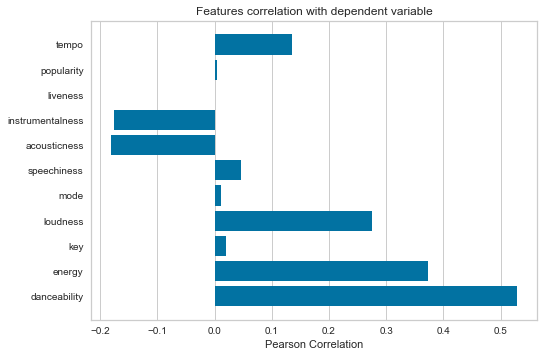

In [29]:
features_names = ["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness",
            "liveness","popularity","tempo"]

X, y = tracks[features_names], tracks["valence"]

# Create a list of the feature names
features = np.array(features_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()

Let's look into the most popular genres in our dataset

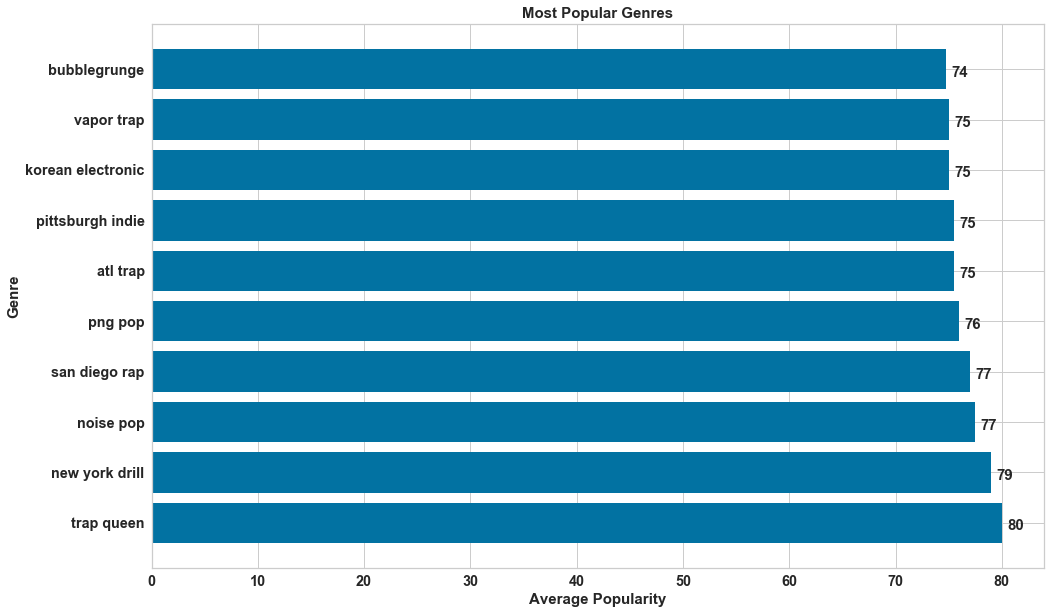

In [30]:
# Get top 10 most popular genres
popular_genres = tracks.groupby("main_genre")["popularity"].mean().sort_values(ascending=False).head(10)

# Plot horizontal bar chart

plt.figure(figsize=(16, 10))
plt.barh(popular_genres.index, popular_genres)

plt.title("Most Popular Genres", fontdict=dict(fontsize=15), fontweight="bold")
plt.xlabel("Average Popularity", fontdict=dict(fontsize=15), fontweight="bold")
plt.ylabel("Genre", fontdict=dict(fontsize=15), fontweight="bold")

plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')

for i, v in enumerate(popular_genres):
    plt.text(v+0.5, i-0.15, str(int(v)), fontdict=dict(fontsize=15), fontweight='bold')

plt.show()

#### See distribution of songs based on a decade

In [ ]:
sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(tracks["decade"].sort_values())
plt.show()

I will remove the songs before 2019.

In [ ]:
tracks = tracks[tracks["release_year"]>2019]

In [ ]:
len(tracks)

### Personal Spotify Data  <a class="anchor" id="ch23"></a>

Authenticate for Spotify API using my personal credentials

In [ ]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                               client_secret=client_secret,
                                               redirect_uri=uri,
                                               scope="user-read-private user-read-email user-read-playback-state user-modify-playback-state user-read-recently-played user-top-read"))

#### Spotify my Top tracks

Spotify API says "long_term" parameter meaning is: "(calculated from several years of data and including all new data as it becomes available". Maximum Top tracks I can get are 50.

In [ ]:
# Get the user's top tracks in the last 3 months

results = sp.current_user_top_tracks(limit=50, offset=0, time_range="long_term")

tracks_names = []
tracks_ids = []
artists_names = []
artists_ids = []

# Get the needed data from your top spotify songs

for item in results["items"]:
    
    track_name = item["name"]
    track_id = item["id"]
    artist_name = item["artists"][0]["name"]
    artist_id =  item["artists"][0]["id"]
    
    tracks_names.append(track_name)
    tracks_ids.append(track_id)
    artists_names.append(artist_name)
    artists_ids.append(artist_id)
    
# Create a Dataframe

data = {"track_name": tracks_names, "track_id": tracks_ids, "artist_name": artists_names, "artist_id": artists_ids }
spotify_top_tracks = pd.DataFrame(data)

spotify_top_tracks.head()

In [ ]:
sp.artist("4Jf1z5Lvop0Y5GmYjsqh1l")

#### Get the genre

In [ ]:
genres = []
spotify_top_tracks["genres"] = ""

for artist_id in spotify_top_tracks["artist_id"]:
    artist_info = sp.artist(artist_id)
    artist_genres = artist_info["genres"]
    genres.append(', '.join(artist_genres))  # Join multiple genres with commas if necessary
    
spotify_top_tracks["genres"] = genres    
spotify_top_tracks["genres"] = spotify_top_tracks["genres"].apply(lambda x: x.split(', '))

spotify_top_tracks.tail()

#### Extract the audio features

In [ ]:
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []

for i in range(0,len(spotify_top_tracks)):
    
    audio_features = sp.audio_features(spotify_top_tracks["track_id"].iloc[i])
    danceability.append(audio_features[0]["danceability"])
    energy.append(audio_features[0]["energy"])
    key.append(audio_features[0]["key"])
    loudness.append(audio_features[0]["loudness"])
    mode.append(audio_features[0]["mode"])
    speechiness.append(audio_features[0]["speechiness"])
    acousticness.append(audio_features[0]["acousticness"])
    instrumentalness.append(audio_features[0]["instrumentalness"])
    liveness.append(audio_features[0]["liveness"])
    valence.append(audio_features[0]["valence"])
    tempo.append(audio_features[0]["tempo"])

spotify_top_tracks["danceability"] = danceability
spotify_top_tracks["energy"] = energy
spotify_top_tracks["key"] = key
spotify_top_tracks["loudness"] = loudness
spotify_top_tracks["mode"] = mode
spotify_top_tracks["speechiness"] = speechiness
spotify_top_tracks["acousticness"] = acousticness
spotify_top_tracks["instrumentalness"] = instrumentalness
spotify_top_tracks["liveness"] = liveness
spotify_top_tracks["valence"] = valence
spotify_top_tracks["tempo"] = tempo

In [ ]:
spotify_top_tracks.head()

In order to have larger dataset of personal favorites in order to get a better recommendation, we will extract data from my favourite playlist, I have created.

#### Get playlists' songs

In [ ]:
# Define the playlist names you want to retrieve
playlist_names = ["sunset road", "Stay calm ", "Summer 2023", "Stay in bed after party"]

track_info_df = pd.DataFrame()
track_info_df["playlist"] = ""
track_info_df["track_name"] = ""
track_info_df["track_id"] = ""
track_info_df["artist_name"] = ""
track_info_df["artist_id"] = ""
track_info_df["danceability"] = ""
track_info_df["energy"] = ""
track_info_df["key"] = ""
track_info_df["loudness"] = ""
track_info_df["mode"] = ""
track_info_df["speechiness"] = ""
track_info_df["acousticness"] = ""
track_info_df["instrumentalness"] = ""
track_info_df["liveness"] = ""
track_info_df["valence"] = ""
track_info_df["tempo"] = ""
track_info_df["genres"] = ""

def get_track_info_from_playlist(playlist_name):
    
    # Get the current user's username
    user = sp.current_user()
    username = user['id']

    # Get the user's playlists
    playlists = sp.user_playlists(username)

    # Find the playlist by name
    for playlist in playlists['items']:
        if playlist['name'] == playlist_name:
            # Get the tracks from the playlist
            playlist_id = playlist['id']
            tracks = sp.playlist_tracks(playlist_id)
            
            # Extract and return track information
            for track in tracks['items']:
                track_id = track['track']['id']
                track_name = track['track']['name']
                artist_name = track['track']['artists'][0]['name']  # Assuming one artist per track
                artist_id = track['track']['artists'][0]['id']
                
                # Fetch the genre information for the artist
                artist_info = sp.artist(artist_id)
                genres = artist_info['genres']
                
                # Get the audio features for the track
                audio_features = sp.audio_features(track_id)[0]
                
                # Add track information to the DataFrame
                track_info_df.loc[len(track_info_df)] = [playlist_name, track_name, track_id, artist_name, artist_id, 
                                                         audio_features['danceability'], audio_features['energy'], 
                                                         audio_features['key'], audio_features['loudness'], 
                                                         audio_features['mode'], audio_features['speechiness'], 
                                                         audio_features['acousticness'], audio_features['instrumentalness'], 
                                                         audio_features['liveness'], audio_features['valence'], 
                                                         audio_features['tempo'], genres]
                
# Iterate through the playlist names and retrieve the track information

for playlist_name in playlist_names:
    get_track_info_from_playlist(playlist_name)

# Print the resulting DataFrame
track_info_df

In [ ]:
fav_playlists_tracks = track_info_df.drop("playlist", axis=1)

In [ ]:
fav_playlists_tracks

In [ ]:
spotify_top_tracks.head()

#### Concatenate the two datasets 

In [ ]:
my_music = pd.concat([fav_playlists_tracks,spotify_top_tracks])

In [ ]:
my_music

In [ ]:
## Some songs are duplicated

my_music.drop_duplicates(subset=["track_id"], inplace=True)
my_music.reset_index(drop=True)

In [ ]:
# Apply the main_genre function from above to create the 'main_genre' column

my_music["main_genre"] = my_music["genres"].apply(get_main_genre)

##### Check the data

In [ ]:
my_music.describe().transpose()

In [ ]:
my_music.columns

### Analysis of Spotify Data  <a class="anchor" id="ch24"></a>

#### Get genres from your data.

In [ ]:
# Extract the genres from your favourite music

top_genres = []

for item in my_music["genres"]:
    top_genres.extend(item)
    
top_genres = list(top_genres)

# Print the user's top genres
print("Top Genres:", top_genres)

##### Plot a Word Cloud

In [ ]:
# Convert the list to a string with genres separated by spaces
genres_text = ' '.join(top_genres)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Genres Word Cloud')
plt.show()

##### Distrinution of some audio features

In [ ]:
# Creating a histogram for danceability
plt.figure(figsize=(10, 6))
plt.hist(my_music["danceability"], bins=10, color="lightgreen", edgecolor="black")
plt.title("Distribution of Danceability")
plt.xlabel("Danceability Score")
plt.ylabel("Frequency")
plt.show()

# Creating a histogram for energy
plt.figure(figsize=(10, 6))
plt.hist(my_music["energy"], bins=10, color="lightblue", edgecolor="black")
plt.title("Distribution of Energy")
plt.xlabel("Energy Score")
plt.ylabel("Frequency")
plt.show()

# Creating a histogram for acousticness
plt.figure(figsize=(10, 6))
plt.hist(my_music["acousticness"], bins=10, color="lightcoral", edgecolor="black")
plt.title("Distribution of Acousticness")
plt.xlabel("Acousticness Score")
plt.ylabel("Frequency")
plt.show()


### Support Vector Machines (SVM)  <a class="anchor" id="ch3"></a>

#### Explanation of SVM  <a class="anchor" id="ch3"></a>

Support Vector Machines (SVM) are powerful supervised machine learning models used for classification and regression tasks. SVM aims to find a hyperplane that best separates data points belonging to different classes while maximizing the margin between the two classes.

##### Mathematical Overview

Let's delve into the mathematical foundations of SVM:

##### Linear SVM for Binary Classification

For binary classification, consider a dataset with \(n\) samples and \(m\) features. The objective is to find a hyperplane defined as:

$$
w \cdot x - b = 0
$$

where:
- $w$ is the weight vector.
- $x$ is the feature vector.
- $b$ is the bias term.

The equation $w \cdot x - b = 0$ represents the decision boundary, with data points on one side classified as one class and data points on the other side as the other class.

##### Margin Maximization

SVM aims to maximize the margin, which is the distance between the decision boundary and the nearest data points from each class. This can be expressed as:

$$
\text{Margin} = \frac{2}{\|w\|}
$$

where $||w||$ is the Euclidean norm of the weight vector \(w\).

##### Soft Margin and Slack Variables

In cases where the data is not perfectly separable, SVM introduces slack variables $x_i$ to allow for some misclassification. This leads to the formulation of the soft-margin SVM:

$$
\min_{w, b, x_i} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
$$

subject to:

$$
y_i(w \cdot x_i - b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$

where $C$ is a hyperparameter controlling the trade-off between maximizing the margin and minimizing misclassification.

##### Kernel Trick

SVM can handle non-linearly separable data by mapping it to a higher-dimensional space using a kernel function $K(x, x')$:

$$
\min_{w, b, \xi} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
$$

subject to:

$$
y_i(w \cdot \phi(x_i) - b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$

Here, $$\phi(x_i)$$ represents the data mapped to a higher-dimensional space.

In practice, SVM is often implemented using machine learning libraries like scikit-learn in Python, which handle the mathematical computations efficiently. That's how it will be used here :).


<img src="svm.png"> [https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47]

## Content-based filtering and PCA <a class="anchor" id="ch4"></a>

### Content-based filtering <a class="anchor" id="ch41"></a>

Content-based filtering plays a vital role in Spotify's song recommendation system, providing users with song suggestions tailored to their musical preferences. This method involves an in-depth analysis of song characteristics and relies on a user's historical listening patterns or explicit feedback.

To illustrate content-based filtering within the Spotify song recommendation framework, let's consider the creation of a feature matrix. In this matrix, each row represents a song, and each column corresponds to various audio features such as tempo, danceability, energy, instrumentalness, and more. Unlike the binary example, these values are continuous, representing the nuanced audio characteristics of each song.

Within this same audio feature space, we define the user's musical profile. Some user-related attributes are explicitly provided, like their affinity for "Jazz" or "High Energy" songs, as indicated in their profile settings. Meanwhile, other attributes are implicit and derive from their past listening behavior. For example, if a user frequently enjoys songs with high danceability and tempo, these audio features contribute to their user profile.

The ultimate aim of this model is to propose songs that align with the user's specific musical tastes and audio preferences. To accomplish this, the system employs a similarity metric, such as cosine similarity or Euclidean distance, to measure how closely each candidate song matches the user's audio profile. It's important to emphasize that these song recommendations are finely tuned for this individual user, as the model does not consider the preferences or actions of other Spotify users.

<img src="colab.png">
[https://towardsdatascience.com/essentials-of-recommendation-engines-content-based-and-collaborative-filtering-31521c964922].

### Cosine similarity <a class="anchor" id="ch42"></a>

Cosine Similarity is a mathematical measure used to determine the similarity between two vectors in a multi-dimensional space, often employed in text mining, recommendation systems, and more. It quantifies the cosine of the angle between the two vectors, providing a value between -1 and 1, where 1 indicates perfect similarity, 0 means no similarity, and -1 denotes complete dissimilarity.

Cosine Similarity $$ \cos(\theta)  =  \frac{{A \cdot B}}{{\|A\| \cdot \|B\|}} $$

$A$ and $B$ are vectors, and \||.\|| is used to represent the norm (magnitude) of vectors $A$ and $B$.

<img src="cosine_similarity.png">

#### Principal Component Analysis (PCA) <a class="anchor" id="ch43"></a>

Principal Component Analysis (PCA) is a dimensionality reduction technique used for simplifying complex datasets while preserving trends and patterns. It achieves this by identifying the principal components (orthogonal directions) in the data that capture the maximum variance.

Let's begin with some mathematical foundations:

##### Mean-Centered Data

Assuming we have a dataset with $$n$$ observations and $$m$$ features. We start by mean-centering the data to have zero mean for each feature:

$$
X = 
\begin{bmatrix}
    x_{11} & x_{12} & \ldots & x_{1m} \\
    x_{21} & x_{22} & \ldots & x_{2m} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & \ldots & x_{nm}
\end{bmatrix}
$$

Subtract the mean of each feature from the corresponding feature values:

$$
\bar{x}_j = \frac{1}{n} \sum_{i=1}^{n} x_{ij}
$$

$$
X_{\text{centered}} = X - \begin{bmatrix} \bar{x}_1 & \bar{x}_2 & \ldots & \bar{x}_m \end{bmatrix}
$$

##### Covariance Matrix

Next, we compute the covariance matrix (\(C\)) of the mean-centered data:

$$
C = \frac{1}{n-1} X_{\text{centered}}^T X_{\text{centered}}
$$

##### Eigenvalue Decomposition

PCA involves finding the eigenvectors $v_i$ and corresponding eigenvalues $\lambda_i$ of the covariance matrix $C$:

$$
C v_i = \lambda_i v_i
$$

Eigenvalues and eigenvectors are mathematical tools used to understand how a matrix transforms data. Eigenvalues tell us how much the data is scaled or stretched in different directions, while eigenvectors show the directions in which this stretching occurs. They are fundamental in various applications, like dimensionality reduction and image processing.
The eigenvectors represent the principal components, and the eigenvalues indicate the amount of variance explained by each component.

##### Selecting Principal Components

The next step is to select a subset of the principal components (eigenvectors) that capture most of the variance. Typically, you sort the eigenvalues in descending order and choose the top \(k\) eigenvectors, where \(k\) is the desired dimensionality of the reduced data.

##### Projecting Data

Finally, you project the original data onto the selected principal components to obtain the reduced-dimensional data:

$$
X_{\text{reduced}} = X_{\text{centered}} V_k
$$

Where $V_k$ is a matrix containing the top $k$ eigenvectors as columns.

<img src="pca.jpg">

[https://miro.medium.com/v2/resize:fit:1200/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg]

### Applying PCA and classify different genres using SVM   <a class="anchor" id="ch5"></a>

In [ ]:
from collections import Counter


genre_counts = Counter(top_genres).most_common()
genre_counts = pd.DataFrame(genre_counts,columns=["Genre", "Frequency"])

genre_counts.head(7)

## Let's choose australian surf rock and art pop.

In [ ]:
## take only the songs in which genre is either australian reggae fusion or art pop

# Define the genres to filter
genres_to_filter = ["australian reggae fusion", "art pop"]

# Use the apply function to filter rows based on genres
filtered_df = spotify_top_tracks[spotify_top_tracks['genres'].apply(lambda x: any(genre in genres_to_filter for genre in x))]

filtered_df["genre_target"] = filtered_df["genres"].apply(lambda x: "australian reggae fusion" if "australian reggae fusion" in x else "art pop" if "art pop" in x else None)

# Display the filtered DataFrame
filtered_df.reset_index(drop=True)

We start by selecting important audio features for analysis. These features include danceability, energy, key, loudness, and more.

Next, we standardize these features to have a mean of zero and a standard deviation of one, preparing them for Principal Component Analysis (PCA).

We apply PCA to reduce the dimensionality of the features to just two principal components, capturing the most essential information in the data.

The results of PCA are stored in a DataFrame, and we create a scatter plot to visualize these results, with each point representing a music track.

To provide context, we label each point with its corresponding music genre, helping us understand how genres are distributed in the reduced feature space.

The plot shows how music tracks cluster or spread out based on the selected audio features, potentially revealing patterns or relationships between different genres.

In [ ]:
# Extract the selected features
selected_features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
X = filtered_df[selected_features]

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=["Principal Component 1", "Principal Component 2"])

# Plot the PCA results and annotate each point with genre
plt.figure(figsize=(10, 6))
for i, row in pca_df.iterrows():
    plt.scatter(row["Principal Component 1"], row["Principal Component 2"], alpha=0.5)
    plt.annotate(filtered_df["genre_target"].iloc[i], (row["Principal Component 1"], row["Principal Component 2"]))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Selected Features")
plt.grid(True)
plt.show()


In [ ]:
pca_df["genre_target"] = filtered_df["genre_target"].reset_index(drop=True)

# Assuming 'pca_df' contains your PCA-transformed features
X = pca_df[["Principal Component 1", "Principal Component 2"]]
y = pca_df["genre_target"]

# Choose two genres for binary classification
genre1 = "australian reggae fusion"  # Replace with your first genre name
genre2 = "art pop"  # Replace with your second genre name


# Reset the index of X and y to align with each other
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Filter the data for the two chosen genres
X_binary = X[(y == genre1) | (y == genre2)]
y_binary = y[(y == genre1) | (y == genre2)]

# Create a binary target variable (0 for genre1, 1 for genre2)
y_binary = (y_binary == genre2).astype(int)

# Create an SVM classifier with a chosen kernel (e.g., linear kernel)
svm_classifier = svm.SVC(kernel="linear")

# Train the classifier on your binary data
svm_classifier.fit(X_binary, y_binary)

# Create a mesh grid to plot the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X_binary.iloc[:, 0].min() - 1, X_binary.iloc[:, 0].max() + 1
y_min, y_max = X_binary.iloc[:, 1].min() - 1, X_binary.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class labels for the mesh grid
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a contour plot for the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the data points
plt.scatter(X_binary.iloc[:, 0], X_binary.iloc[:, 1], c=y_binary, cmap=plt.cm.coolwarm)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary and Data Points (Binary Classification)")
plt.grid(True)

# Show the plot
plt.show()

In this code segment, we first assign genre labels to our PCA-transformed data. We then prepare the data for binary classification using Support Vector Machines (SVM). We've selected two music genres, "Australian Reggae Fusion" and "Art Pop," for this classification task.

Next, we filter the data to focus on instances of these two chosen genres and create a binary target variable where one class corresponds to "Australian Reggae Fusion" (0) and the other to "Art Pop" (1). We employ an SVM classifier with a linear kernel to train on this binary data.

The code also generates a decision boundary plot to visualize how well the SVM classifies these genres in the reduced feature space. This analysis helps us understand whether the selected PCA-transformed features are effective in distinguishing between the chosen music genres through SVM classification.

## Extract recommendations using Cosine Similarity Calculation 

The function below is designed to help you discover songs that are similar to your own favorite music based on audio features. It does so by utilizing Principal Component Analysis (PCA) for dimensionality reduction and cosine similarity for measuring the likeness between songs.

**Function Parameters**:

- selected_tracks: This is a DataFrame containing a selection of songs that you want to compare to your music.

- my_music_df: Another DataFrame that holds the audio feature data of your music.

- num_pca_components: You can specify the number of components to retain after applying PCA. By default, it's set to 3, but you can adjust this number to fine-tune the recommendation process.

- threshold: This parameter defines a similarity threshold, which is set to 0.8 by default. It helps filter out songs that don't closely match your music. You can modify this threshold to make the recommendations stricter or more lenient.

**Function Workflow**:

- Feature Selection: Initially, the function selects the relevant audio feature columns that will be used for PCA. These columns typically include characteristics such as 'danceability,' 'energy,' 'key,' 'loudness,' 'mode,' 'speechiness,' 'acousticness,' 'instrumentalness,' 'liveness,' 'valence,' and 'tempo.' These features describe the musical attributes of songs.

- PCA on Your Music: PCA is applied to the audio feature data of your music. PCA is a dimensionality reduction technique that identifies essential patterns in the data and reduces it to a lower-dimensional space while retaining as much of the original information as possible. The results of this PCA transformation are stored in the pca_df DataFrame, with columns named 'PCA1,' 'PCA2,' and so on.

**Song Comparison**:

The function proceeds to compare your music with the selected tracks:
It calculates PCA features for the selected tracks using the same PCA model trained on your music.
It computes the mean of the PCA features for your music, creating a vector called my_music_pca_mean.

**Cosine Similarity**: Cosine similarity is then computed between my_music_pca_mean and the PCA features of each selected track. Cosine similarity measures the cosine of the angle between two vectors and indicates how similar or dissimilar they are. The result is a measure of similarity between your music and each selected track.

**Recommendation**: The function filters the selected tracks based on the cosine similarity values. Tracks with similarity values exceeding the specified threshold are considered similar to your music and are returned as recommendations.

In summary, this function offers a way to discover songs similar to your own music by utilizing PCA to reduce dimensionality and cosine similarity to quantify the likeness between songs. It provides flexibility through adjustable parameters, allowing you to fine-tune the recommendation process based on your preferences.

##### Select a random sample of the tracks dataset to find similar songs.

In [ ]:
selected_tracks = tracks.sample(n=25, random_state=42)

In [ ]:
def recommend_similar_songs(selected_tracks, my_music_df, num_pca_components=2, threshold=0.8):
    
    # Select the audio feature columns for PCA
    feature_names = ["danceability", "energy", "key", "loudness", "mode",
                 "speechiness", "acousticness", "instrumentalness",
                 "liveness", "valence", "tempo"]

    # Extract the audio features data for my_music
    audio_features_data = my_music_df[audio_features_columns]

    # Initialize PCA with the specified number of components
    pca = PCA(n_components=num_pca_components)

    # Perform PCA on the audio features of my_music
    pca_result = pca.fit_transform(audio_features_data)

    # Create a DataFrame with the PCA results
    pca_df = pd.DataFrame(data=pca_result, columns=[f'PCA{i+1}' for i in range(num_pca_components)])

    # Calculate the PCA features for the selected tracks
    selected_audio_features_data = selected_tracks[audio_features_columns]
    pca_result_selected = pca.transform(selected_audio_features_data)

    # Calculate the mean of the PCA features for my_music
    my_music_pca_mean = pca_df.mean().values.reshape(1, -1)

    # Compute cosine similarity between my_music_pca_mean and each track in the selected tracks
    cosine_similarities = cosine_similarity(my_music_pca_mean, pca_result_selected)
    
    # Create a DataFrame with track names and cosine similarities
    track_names = selected_tracks["id"].reset_index(drop=True)
    cosine_similarity_df_pca = pd.DataFrame({"Track ID": track_names, "Cosine Similarity": cosine_similarities[0]})
    
    
    # Filter and select songs with similarity above the specified threshold
    similar_songs = selected_tracks[cosine_similarities[0] > threshold].reset_index(drop=True)

    return similar_songs, cosine_similarity_df_pca


In [ ]:
[df_recommended_songs_pca,cosine_similarity_df_pca] = recommend_similar_songs(selected_tracks, my_music)

In [ ]:
df_recommended_songs_pca

The function below essentiall does the same without performing PCA.

- **Feature Selection**: The function selects specific audio feature columns for comparison. These features are 'danceability,' 'energy,' 'key,' 'loudness,' 'mode,' 'speechiness,' 'acousticness,' 'instrumentalness,' 'liveness,' 'valence,' and 'tempo.'

- **Mean Calculation**: It calculates the mean of these selected audio features for your music (my_music).

- **Cosine Similarity**: The function computes the cosine similarity between the mean audio features of your music (my_music_mean) and each track in the provided selected_tracks. Cosine similarity measures how similar two vectors are by calculating the cosine of the angle between them.

- **Threshold Filtering**: It filters and selects songs from the selected_tracks DataFrame where the cosine similarity values with your music are greater than the specified threshold.

- **Recommendation**: The function returns the selected songs as recommendations, which are similar to your music based on the chosen audio features and above the specified similarity threshold.

In [ ]:
def recommend_similar_songs_no_pca(selected_tracks, my_music_df, threshold=0.999):
    # Select the audio feature columns for similarity
    audio_features_columns = ["danceability", "energy", "key", "loudness", "mode",
                 "speechiness", "acousticness", "instrumentalness",
                 "liveness", "valence", "tempo"]


  
    # Calculate the mean of the audio features for my_music
    my_music_mean = my_music[audio_features_columns].mean().values.reshape(1, -1)

    # Calculate cosine similarity between my_music_mean and each track in the selected tracks
    cosine_similarities = cosine_similarity(my_music_mean, selected_tracks[audio_features_columns])

    # Create a DataFrame with track names and cosine similarities
    track_names = selected_tracks["id"].reset_index(drop=True)
    cosine_similarity_df_no_pca = pd.DataFrame({"Track ID": track_names, "Cosine Similarity": cosine_similarities[0]})
    
    
    # Filter and select songs with similarity above the specified threshold
    similar_songs = selected_tracks[cosine_similarities[0] > threshold].reset_index(drop=True)

    return similar_songs, cosine_similarity_df_no_pca


In [ ]:
[df_recommended_songs_no_pca,cosine_similarity_df_no_pca] = recommend_similar_songs_no_pca(selected_tracks, my_music)

In [ ]:
df_recommended_songs_no_pca

In [ ]:
cosine_similarity_df_no_pca

In [ ]:
# Create subplots with two columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot recommendations from the PCA-based system
ax1.barh(cosine_similarity_df_pca["Track ID"], cosine_similarity_df_pca["Cosine Similarity"], color="blue")
ax1.set_xlabel("Cosine Similarity")
ax1.set_title("Recommendations with PCA")

# Plot recommendations from the non-PCA-based system
ax2.barh(cosine_similarity_df_no_pca["Track ID"], cosine_similarity_df_no_pca["Cosine Similarity"], color="green")
ax2.set_xlabel("Cosine Similarity")
ax2.set_title("Recommendations without PCA")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


##### Fillter by genre

In [ ]:
tracks_art_pop = tracks[tracks["main_genre"]=="art pop"]

tracks_art_pop

In [ ]:
my_music_art_pop = my_music[my_music["main_genre"]=="art pop"]

In [ ]:
my_music_art_pop.head()

In [ ]:
[df_recommended_songs_pca_ap,cosine_similarity_df_pca_ap] = recommend_similar_songs(tracks_art_pop, my_music_art_pop)

In [ ]:
df_recommended_songs_pca

In [ ]:
[df_recommended_songs_no_pca_ap,cosine_similarity_df_no_pca_ap] = recommend_similar_songs_no_pca(tracks_art_pop, my_music_art_pop)

In [ ]:
df_recommended_songs_no_pca_ap

In [ ]:
# Create subplots with two columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot recommendations from the PCA-based system
ax1.barh(cosine_similarity_df_pca_ap["Track ID"], cosine_similarity_df_pca_ap["Cosine Similarity"], color="blue")
ax1.set_xlabel("Cosine Similarity")
ax1.set_title("Recommendations with PCA")

# Plot recommendations from the non-PCA-based system
ax2.barh(cosine_similarity_df_no_pca_ap["Track ID"], cosine_similarity_df_no_pca_ap["Cosine Similarity"], color="green")
ax2.set_xlabel("Cosine Similarity")
ax2.set_title("Recommendations without PCA")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Analysis and Conclusion  <a class="anchor" id="ch6"></a>

In this analysis, we delve into the comparison of two recommendation systems: one incorporating Principal Component Analysis (PCA) and the other not utilizing PCA. The primary objective is to evaluate the effectiveness of each system in delivering personalized song recommendations.

The recommendation system that integrates PCA leverages dimensionality reduction techniques to transform complex audio features into a more streamlined representation. This dimensionality reduction offers notable advantages, including improved computational efficiency and the preservation of essential information while simplifying calculations.

Conversely, the system without PCA operates directly on the original feature space, retaining the fine-grained details of each musical attribute. This approach, while preserving high granularity, may pose computational challenges due to the increased complexity of the feature space.

To comprehensively assess the performance of these systems, several key factors are considered. These encompass recommendation accuracy, computational resource requirements, user satisfaction, and the integration of Support Vector Machines (SVM) for genre classification.

The PCA-based recommendation system, owing to its reduced dimensionality, often demonstrates faster recommendation generation due to streamlined calculations. However, it is imperative to scrutinize whether this efficiency comes at the expense of recommendation quality.

In contrast, the system without PCA may provide highly detailed recommendations but could potentially demand more computational resources and time for processing. This trade-off necessitates careful examination to understand its implications for the user experience.

Incorporating SVM for the classification of two specific music genres within these recommendation systems adds an additional layer of complexity. SVMs are robust classifiers known for their ability to distinguish between different classes. The effectiveness of genre classification within each system, with or without PCA, will be instrumental in assessing the overall system performance.

User satisfaction remains a paramount factor in evaluating recommendation systems. A successful system should not only offer accurate recommendations but also align with user preferences and expectations. This element becomes pivotal in determining which system, PCA-based or not, delivers a more satisfying and engaging user experience.

Conclusion

In conclusion, the choice between a recommendation system with PCA and one without PCA involves a delicate balance of factors such as recommendation accuracy, computational efficiency, and user satisfaction. Additionally, the integration of SVM for genre classification further enriches the analysis. The ultimate decision should be guided by the specific requirements and priorities of the recommendation system's target audience and use case.

## Bibliography <a class="anchor" id="bibi"></a>